In [1]:
import quandl
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
stock = yf.Ticker("TSLA")
df = stock.history(period='max')
df = df[['Close']]
df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [3]:
forecast_out = 30
df['Prediction'] = df[['Close']].shift(-forecast_out)
X = np.array(df.drop(['Prediction'], 1))
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
# Best possible confidence is 1.00
svm_confidence = svr_rbf.score(x_test, y_test)
print('SVM Confidence:', svm_confidence)

SVM Confidence: 0.9378064257916723


In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr_confidence = lr.score(x_test, y_test)
print('LR Confidence: ', lr_confidence)

LR Confidence:  0.9347378709048496


In [9]:
x_validation = np.array(df.drop(['Prediction'], 1))[-forecast_out*2:]
# Shave off the last 30 days for validation to compare
x_validation = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
actual_values = np.array(df.drop(['Prediction'], 1))[-forecast_out:]

In [10]:
# Print predictions for the next 30 days
lr_prediction = lr.predict(x_validation)
print(lr_prediction)

[259.58303403 261.70025261 256.91268135 253.62239939 255.60610034
 254.74776022 297.66432961 324.79715012 324.39658267 313.43856126
 312.28459055 312.1987609  310.66328628 314.63068819 314.3922628
 323.31889527 331.86408204 333.39001033 340.97192012 345.58783209
 341.94468522 345.034698   347.72414334 345.64505186 354.73382639
 347.77181677 350.26096383 329.47982818 332.62703163 325.55058249]


In [11]:
svr_prediction = svr_rbf.predict(x_validation)
print(svr_prediction)

[247.01756776 254.0112267  257.59432424 220.82741074 249.29552876
 231.97410001 335.09761615 314.09060918 305.17185858 314.59466602
 317.60599486 318.19695751 319.66846799 314.49517895 315.3053581
 307.36055589 294.9840625  314.92295952 322.89740078 323.82169261
 328.94737164 321.94714782 305.31676611 323.81346106 327.74893981
 305.33616071 324.54483428 310.13046787 297.68324258 338.03995363]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


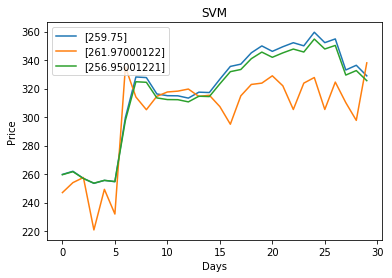

In [12]:
plt.figure()
plt.plot(actual_values)
plt.plot(svr_prediction)
plt.plot(lr_prediction)
plt.legend(actual_values, loc='upper left')
plt.title('SVM')
plt.ylabel('Price')
plt.xlabel('Days')
plt.show()